In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm1
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
dataset = pd.read_csv("letter-recognition.data", sep = ",")

In [ ]:
X = dataset.iloc[:, 1 : 17]
Y = dataset.select_dtypes(include = [object])

In [ ]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


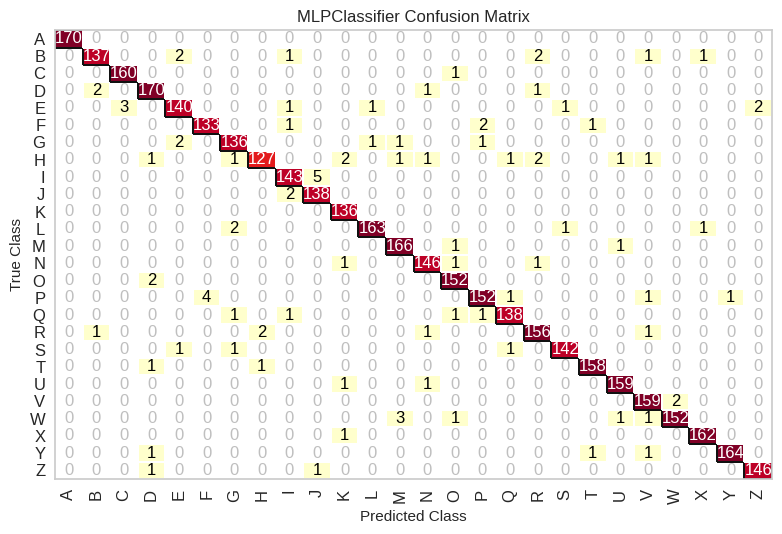

In [ ]:
from yellowbrick.classifier import confusion_matrix
cm = confusion_matrix(mlp,X_train,Y_train, X_validation, Y_validation, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [ ]:
# !pip install yellowbrick

In [ ]:
cm.fit(X_train, Y_train.values.ravel())

ConfusionMatrix(ax=<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f774f39c550>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

In [ ]:
cm.score(X_validation, Y_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97625

In [ ]:
predictions = cm.predict(X_validation)
predictions

array(['C', 'I', 'H', ..., 'R', 'B', 'W'], dtype='<U1')

In [ ]:
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.97625
